In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
from scipy.special import expit, logit

from bids import BIDSLayout
from mne_bids import BIDSPath, read_raw_bids
from util.praat import get_articulation_rates

import pymc3 as pm
from theano import tensor as tt
import arviz as az

from pysyllables import get_syllable_count
import re

In [2]:
BIDS_ROOT = 'bids_dataset'

In [3]:
layout = BIDSLayout(BIDS_ROOT)
subjects = layout.get_subjects()
subjects.sort()

events = []

for i, sub in enumerate(subjects):
    
    # load EEG file
    bids_path = BIDSPath(
        root = BIDS_ROOT,
        subject = sub,
        task = 'daf',
        datatype = 'eeg',
        extension = 'vhdr'
    )
    raw = read_raw_bids(bids_path)
    ev_file = layout.get(
        return_type = 'file',
        subject = sub,
        suffix = 'events',
        extension = 'tsv'
    )[0]
    ev = pd.read_csv(ev_file, sep = '\t')
    ev = ev[ev.trial_type.str.contains('random')].reset_index() # only test blocks
    ev['subject'] = np.full(ev.shape[0], i)
    

    # compute articulation rates and add them to events
    audio_ch = 'egg' # channel from which to estimate voicing duration
    audio = raw.pick_channels([audio_ch])
    audio.load_data()
    audio = audio.filter(l_freq = 40., h_freq = None, picks = [audio_ch])
    n_syllables, speech_durs = get_articulation_rates(audio, ev, audio_ch)
    ev['est_syllables'] = n_syllables
    ev['speech_durs'] = speech_durs
    ev['articulation_rate'] = n_syllables / speech_durs
    events.append(ev)
    
events = pd.concat(events)

def count_syllables(sentence): 
    words = re.findall('\w+', sentence)
    cts = [get_syllable_count(w) for w in words]
    return sum(cts)
events['syllables'] = events.sentence.apply(count_syllables)

/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/bids/layout/models.py:148: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  warnings.warn("The 'extension' entity currently excludes the leading dot ('.'). "


Extracting parameters from bids_dataset/sub-01/eeg/sub-01_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-01/eeg/sub-01_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-01/eeg/sub-01_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-01/eeg/sub-01_electrodes.tsv.


--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 9769499  =      0.000 ...   976.950 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-02/eeg/sub-02_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-02/eeg/sub-02_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-02/eeg/sub-02_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-02/eeg/sub-02_electrodes

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 22101999  =      0.000 ...  2210.200 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-03/eeg/sub-03_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-03/eeg/sub-03_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-03/eeg/sub-03_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-03/eeg/sub-03_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 18957499  =      0.000 ...  1895.750 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-04/eeg/sub-04_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-04/eeg/sub-04_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-04/eeg/sub-04_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-04/eeg/sub-04_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 21831499  =      0.000 ...  2183.150 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-05/eeg/sub-05_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-05/eeg/sub-05_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-05/eeg/sub-05_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-05/eeg/sub-05_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 12419999  =      0.000 ...  1242.000 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-06/eeg/sub-06_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-06/eeg/sub-06_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-06/eeg/sub-06_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-06/eeg/sub-06_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 13614999  =      0.000 ...  1361.500 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-07/eeg/sub-07_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-07/eeg/sub-07_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-07/eeg/sub-07_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-07/eeg/sub-07_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 16454499  =      0.000 ...  1645.450 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-08/eeg/sub-08_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-08/eeg/sub-08_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-08/eeg/sub-08_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-08/eeg/sub-08_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 15089999  =      0.000 ...  1509.000 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-09/eeg/sub-09_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-09/eeg/sub-09_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-09/eeg/sub-09_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-09/eeg/sub-09_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 13994499  =      0.000 ...  1399.450 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-10/eeg/sub-10_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-10/eeg/sub-10_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-10/eeg/sub-10_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-10/eeg/sub-10_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 10248999  =      0.000 ...  1024.900 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-11/eeg/sub-11_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-11/eeg/sub-11_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-11/eeg/sub-11_task-daf_channels.tsv.


/tmp/ipykernel_515345/3952476348.py:17: RuntimeWarning: Unable to map `hand` value to MNE. Not setting subject handedness.
  raw = read_raw_bids(bids_path)


Reading 0 ... 22348999  =      0.000 ...  2234.900 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-12/eeg/sub-12_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-12/eeg/sub-12_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-12/eeg/sub-12_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-12/eeg/sub-12_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 19334499  =      0.000 ...  1933.450 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-13/eeg/sub-13_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-13/eeg/sub-13_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-13/eeg/sub-13_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-13/eeg/sub-13_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 15099999  =      0.000 ...  1510.000 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-14/eeg/sub-14_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-14/eeg/sub-14_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-14/eeg/sub-14_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-14/eeg/sub-14_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 11154499  =      0.000 ...  1115.450 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-15/eeg/sub-15_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-15/eeg/sub-15_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-15/eeg/sub-15_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-15/eeg/sub-15_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-16/eeg/sub-16_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-16/eeg/sub-16_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-16/eeg/sub-16_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-16/eeg/sub-16_electrodes.tsv.


--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 18757999  =      0.000 ...  1875.800 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-17/eeg/sub-17_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-17/eeg/sub-17_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-17/eeg/sub-17_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-17/eeg/sub-17_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 20352499  =      0.000 ...  2035.250 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-18/eeg/sub-18_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-18/eeg/sub-18_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-18/eeg/sub-18_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-18/eeg/sub-18_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 14459999  =      0.000 ...  1446.000 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-19/eeg/sub-19_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-19/eeg/sub-19_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-19/eeg/sub-19_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-19/eeg/sub-19_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 14222499  =      0.000 ...  1422.250 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-20/eeg/sub-20_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-20/eeg/sub-20_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-20/eeg/sub-20_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-20/eeg/sub-20_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 11950999  =      0.000 ...  1195.100 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-21/eeg/sub-21_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-21/eeg/sub-21_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-21/eeg/sub-21_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-21/eeg/sub-21_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 17280499  =      0.000 ...  1728.050 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-22/eeg/sub-22_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-22/eeg/sub-22_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-22/eeg/sub-22_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-22/eeg/sub-22_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 13435999  =      0.000 ...  1343.600 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-23/eeg/sub-23_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-23/eeg/sub-23_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-23/eeg/sub-23_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-23/eeg/sub-23_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 12087999  =      0.000 ...  1208.800 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-24/eeg/sub-24_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-24/eeg/sub-24_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-24/eeg/sub-24_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-24/eeg/sub-24_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 12920999  =      0.000 ...  1292.100 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-25/eeg/sub-25_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-25/eeg/sub-25_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-25/eeg/sub-25_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-25/eeg/sub-25_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 16532999  =      0.000 ...  1653.300 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-26/eeg/sub-26_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-26/eeg/sub-26_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-26/eeg/sub-26_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-26/eeg/sub-26_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 12172499  =      0.000 ...  1217.250 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-27/eeg/sub-27_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-27/eeg/sub-27_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-27/eeg/sub-27_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-27/eeg/sub-27_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 10491999  =      0.000 ...  1049.200 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-28/eeg/sub-28_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-28/eeg/sub-28_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-28/eeg/sub-28_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-28/eeg/sub-28_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 18296999  =      0.000 ...  1829.700 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-29/eeg/sub-29_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-29/eeg/sub-29_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-29/eeg/sub-29_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-29/eeg/sub-29_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 13325499  =      0.000 ...  1332.550 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-30/eeg/sub-30_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-30/eeg/sub-30_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-30/eeg/sub-30_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-30/eeg/sub-30_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 17313999  =      0.000 ...  1731.400 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-31/eeg/sub-31_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-31/eeg/sub-31_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-31/eeg/sub-31_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-31/eeg/sub-31_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 14386999  =      0.000 ...  1438.700 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)

Extracting parameters from bids_dataset/sub-32/eeg/sub-32_task-daf_eeg.vhdr...
Setting channel info structure...
Reading events from bids_dataset/sub-32/eeg/sub-32_task-daf_events.tsv.
Reading channel info from bids_dataset/sub-32/eeg/sub-32_task-daf_channels.tsv.
Reading in coordinate system frame CapTrak: None.
Reading electrode coords from bids_dataset/sub-32/eeg/sub-32_electrode

--- Logging error ---
Traceback (most recent call last):
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 1083, in emit
    msg = self.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 927, in format
    return fmt.format(record)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 663, in format
    record.message = record.getMessage()
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/logging/__init__.py", line 367, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/johnv/anaconda3/envs/daf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16,

Reading 0 ... 12297999  =      0.000 ...  1229.800 secs...
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 40.00
- Lower transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 35.00 Hz)
- Filter length: 3301 samples (0.330 sec)



In [4]:
n_sub = len(layout.get_subjects())
n_param = 4

model = pm.Model()
with model:
    
    # grouping variable
    sub = pm.Data('subject', events.subject.to_numpy())
    delay = pm.Data('delay', events.delay.to_numpy())
    dur = pm.Data('duration', events.speech_durs.to_numpy())
    post = pm.Data('post-adaption', (events.trial_type.to_numpy() == 'random2').astype(int))
    
    # priors for population-level parameters
    b0 = pm.Normal('b0', np.log(4), 1) # log rate at zero delay
    _b1 = pm.Exponential('_b1', .1) 
    b1 = pm.Deterministic('b1', -1 * _b1) # effect of delay -- on scale of delay
    b2 = pm.Normal('b2', 0, 1) # effect of adaption -- unitless
    b3 = pm.Normal('b3', 0, 10) # interaction -- same scale as beta1
    
    # multivariate normal distribution of subject-specific params (uncentered)
    z = pm.Normal("z", 0.0, 1.0, shape = (n_param, n_sub))
    chol, corr, stds = pm.LKJCholeskyCov( # correlation matrix
        "chol", 
        n = n_param, 
        eta = 2.0, 
        sd_dist = pm.Exponential.dist(1), 
        compute_corr = True
    )
    offsets = tt.dot(chol, z).T # MVNormal draws, n_sub x n_param
    b0_sub = pm.Deterministic('b0_sub', b0 + offsets[:, 0])
    b1_sub = pm.Deterministic('b1_sub', b1 + offsets[:, 1])
    b2_sub = pm.Deterministic('b2_sub', b2 + offsets[:, 2])
    b3_sub = pm.Deterministic('b3_sub', b3 + offsets[:, 3])
    
    # poisson regression model given subject-specific params (and duration offset)
    theta = np.log(dur) + b0_sub[sub] + b1_sub[sub]*delay + b2_sub[sub]*post + b3_sub[sub]*post*delay 
    lam = np.exp(theta)
    y = pm.Poisson('y', lam, observed = events.syllables.to_numpy().astype(int))

In [5]:
with model:
    trace = pm.sample(
        2000, 
        target_accept = 0.9,
        random_seed = 0,
        return_inferencedata = True
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [chol, z, b3, b2, _b1, b0]


Sampling 3 chains for 1_000 tune and 2_000 draw iterations (3_000 + 6_000 draws total) took 234 seconds.
The number of effective samples is smaller than 10% for some parameters.


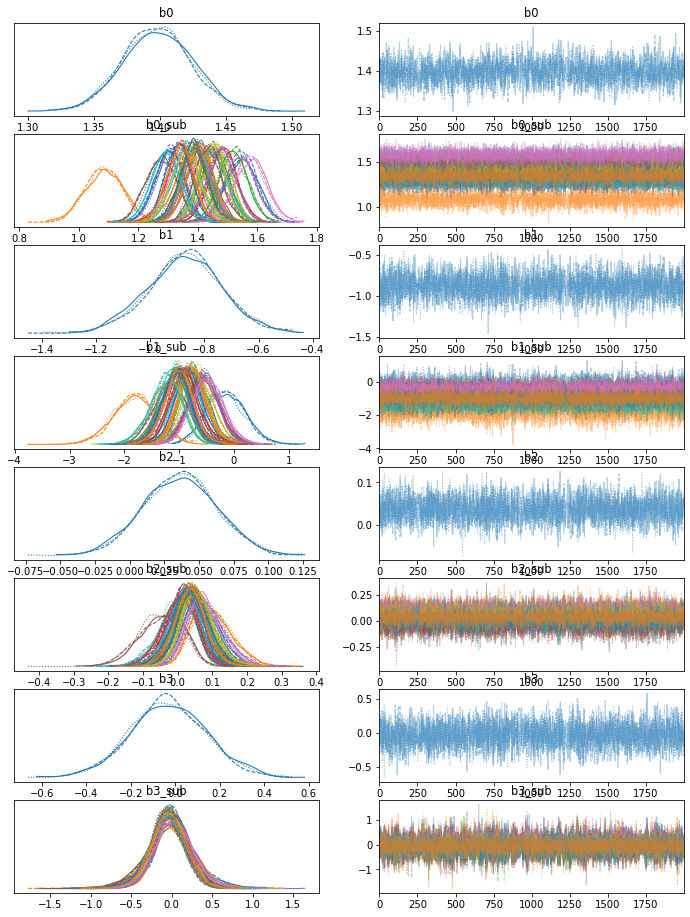

In [6]:
ax = az.plot_trace(trace, var_names = ['b0', 'b0_sub', 'b1', 'b1_sub', 'b2', 'b2_sub', 'b3', 'b3_sub'])

In [7]:
hdi_prob = .90
az.hdi(trace, hdi_prob, var_names = ['b0', 'b1', 'b2', 'b3'])

<xarray.Dataset>
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 'lower' 'higher'
Data variables:
    b0       (hdi) float64 1.356 1.44
    b1       (hdi) float64 -1.111 -0.6518
    b2       (hdi) float64 -0.009014 0.07832
    b3       (hdi) float64 -0.2957 0.2655

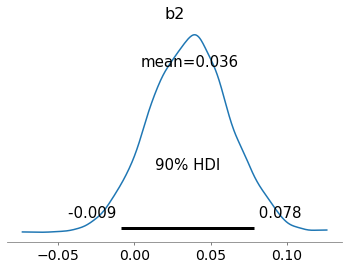

In [8]:
ax = az.plot_posterior(trace, var_names = ['b2'], hdi_prob = .9)
plt.show()

In [9]:
# gather samples for population parameters 
trc = trace.posterior.stack(draws = ("chain", "draw"))
b0 = trc['b0'].values
b1 = trc['b1'].values
b2 = trc['b2'].values
b3 = trc['b3'].values

In [10]:
(b2 > 0).mean()

0.9163333333333333

In [11]:
# get posterior for predicted rates
t_max = np.max(events.delay)
x = np.stack([np.linspace(0, t_max, 500) for i in range(b0.shape[0])], axis = 1)
p1 = np.exp(b0 + b1*x)
p2 = np.exp((b0 + b2) + (b1 + b3)*x)
delta = p2 - p1

/tmp/ipykernel_515345/2957971872.py:3: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = az.hdi(p.T, hdi_prob = .8)
/tmp/ipykernel_515345/2957971872.py:3: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = az.hdi(p.T, hdi_prob = .8)


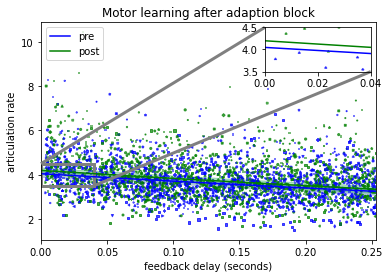

In [12]:
def plot_hdi(x, p, label, mean_col = 'blue', hdi_col = 'lightsteelblue'):
    m = p.mean(1)
    hdi = az.hdi(p.T, hdi_prob = .8)
    plt.fill_between(x[:,0], hdi[:,0], hdi[:,1], color = hdi_col, alpha = 1 if mean_col == 'blue' else .4)
    plt.plot(x[:,0], m, color = mean_col, label = label)
    
markers = [m for m in mpl.markers.MarkerStyle.markers]

plot_hdi(x, p1, 'pre') # before adaption
plot_hdi(x, p2, 'post', 'green', 'mediumseagreen') # after adaption
for i in range(n_sub):
    ev = events[events.subject == i]
    col = np.where(ev.trial_type.to_numpy() == 'random2', 'green', 'blue')
    plt.scatter(ev.delay, ev.syllables / ev.speech_durs, color = col, s = 5, marker = markers[i], alpha = .7)
plt.xlabel('feedback delay (seconds)')
plt.ylabel('articulation rate')
plt.legend(labels = ['pre', 'post'], loc = 'upper left')
plt.title('Motor learning after adaption block')
plt.xlim(0., t_max)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
ax = plt.gca()
axins = zoomed_inset_axes(ax, 2, loc = 1)
axins.scatter(ev.delay, ev.syllables / ev.speech_durs, color = col, s = 5, marker = markers[i], alpha = .7)
axins.plot(x[:,0], p1.mean(1), color = 'blue')
axins.plot(x[:,0], p2.mean(1), color = 'green')
axins.set_xlim(0., .04)
axins.set_ylim(3.5, 4.5)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", linewidth = 3)

plt.show()

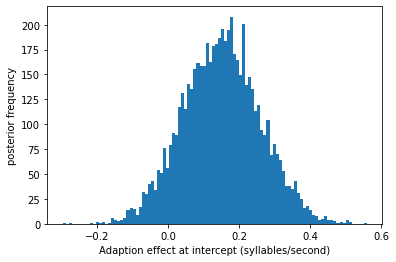

The 90.0% HDI of the syllable rate shift is: (-0.03, 0.33) syllables/sec.
The posterior mean of the shift is 0.15 syllables/sec.


In [13]:
d = delta[0,:]
ax = plt.hist(d, bins = 100)
plt.xlabel('Adaption effect at intercept (syllables/second)')
plt.ylabel('posterior frequency')
plt.show()
hdi = az.hdi(d, hdi_prob)
print('The {:.1f}% HDI of the syllable rate shift is: ({:.2f}, {:.2f}) syllables/sec.'.format(
    hdi_prob * 100, hdi[0], hdi[1])
     )
print('The posterior mean of the shift is {:.2f} syllables/sec.'.format(d.mean()))

In [14]:
corr = trc['chol_corr'].values
corr.mean(-1)

array([[ 1.        ,  0.4344164 , -0.00951682,  0.07003202],
       [ 0.4344164 ,  1.        ,  0.13611223,  0.00921364],
       [-0.00951682,  0.13611223,  1.        , -0.03499899],
       [ 0.07003202,  0.00921364, -0.03499899,  1.        ]])

In [41]:
null_width = .05
bf = (d > null_width).sum() / (d < null_width).sum()
print(
'''
The Bayes Factor for a positive shift relative to the null hypothesis that the shift 
is less than {:.2f} syllables/second of zero is {:.2f}.
'''.format(null_width, bf)
)


The Bayes Factor for a positive shift relative to the null hypothesis that the shift 
is less than 0.05 syllables/second of zero is 4.50.



In [38]:
def get_rate(t):
    return np.exp(b0 + b1*t).mean()
get_rate(-.02) - get_rate(.0)

0.07126838894811538

In [39]:
get_rate(0) - get_rate(.2)

0.6468395375804206